<a href="https://colab.research.google.com/github/Ranjan4Kumar/zulu_bike_demand_Prediction/blob/main/Seoul_bike_using_Ensemble_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install xgboost


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.tree import export_graphcviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
%matplotlib inline
sns.set()

In [13]:
data = pd.read_csv('/content/SeoulBikeData.csv')

In [14]:
data

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [15]:
# cehcking duplicates in  whole dataset
len(data[data.duplicated()])

0

In [16]:
# converting date variable into datetime datatype
'''
.dt.strptime() This function is used to parse a string representing a date and time and convert it into a datetime object.

Here's the basic syntax of the strptime function:


# from datetime import datetime

formatted_datetime = datetime.strptime(date_string, format)
date_string: The string containing the date and time information you want to parse.
format: A format string that specifies how the date and time information is structured in the date_string.
For example, if you have a date string in the format "2023-08-19" and you want to convert it into a datetime object, you would use the following code:



date_string = "2023-08-19"
format = "%Y-%m-%d"

formatted_datetime = datetime.strptime(date_string, format)
print(formatted_datetime)
In this example, the format string %Y-%m-%d corresponds to the year, month, and day components of the date string.

Here are some commonly used format codes for strptime:

%Y: Year with century as a decimal number (e.g., 2023)
%m: Month as a zero-padded decimal number (e.g., 08)
%d: Day of the month as a zero-padded decimal number (e.g., 19)
%H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 15)
%M: Minute as a zero-padded decimal number (e.g., 30)
%S: Second as a zero-padded decimal number (e.g., 45)
You can find more format codes and details in the Python documentation for strftime and strptime.

Keep in mind that the strptime function is useful for converting strings to datetime objects, while the strftime function (with a similar syntax) is used for formatting datetime objects into strings.
'''
data['Date'] = data['Date'].apply(lambda x : dt.strptime(x,'%d/%m/%Y'))

In [17]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [22]:
# Renaming the columns
data.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [23]:
data.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [26]:
# There is correlation between dew point temperature and temperature
data[['temperature','dew_point_temp']].corr()
#Here we can see it has hugely correlated with each other we will drop one column

data.drop('dew_point_temp', axis = 1, inplace = True)

In [27]:
# New feature 'month' and day_of_week from the date

for data in [data]:
  data['month'] = data['date'].dt.month
  data['day_of_week'] = data['date'].dt.dayofweek

In [28]:
# new feature 'weekend'
data['weekend'] = data['day_of_week'].apply(lambda x : 1 if x>4 else 0)

In [29]:
data.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,day_of_week,weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0


In [30]:
dependent_variable = ['rented_bike_count']

In [31]:
#. Analyzing the relationship between dependent variable and categorical independent variables:

categorical_var = ['hour','seasons','holiday','func_day','month','day_of_week','weekend']



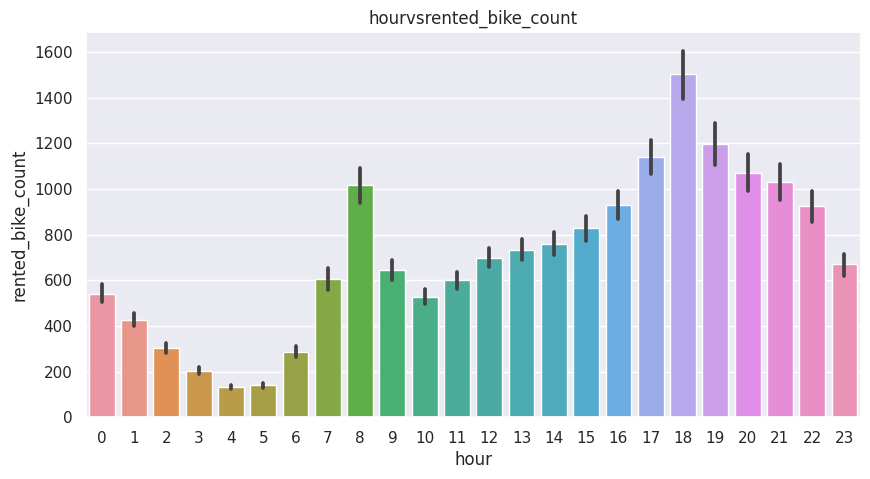

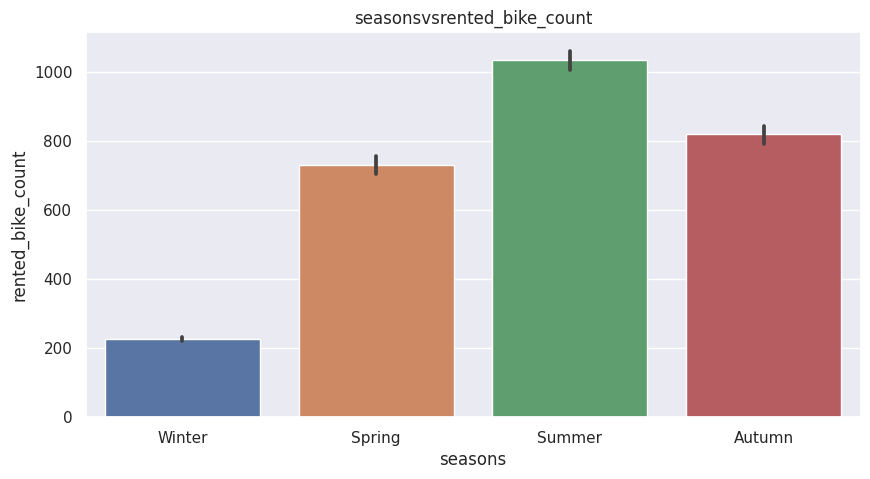

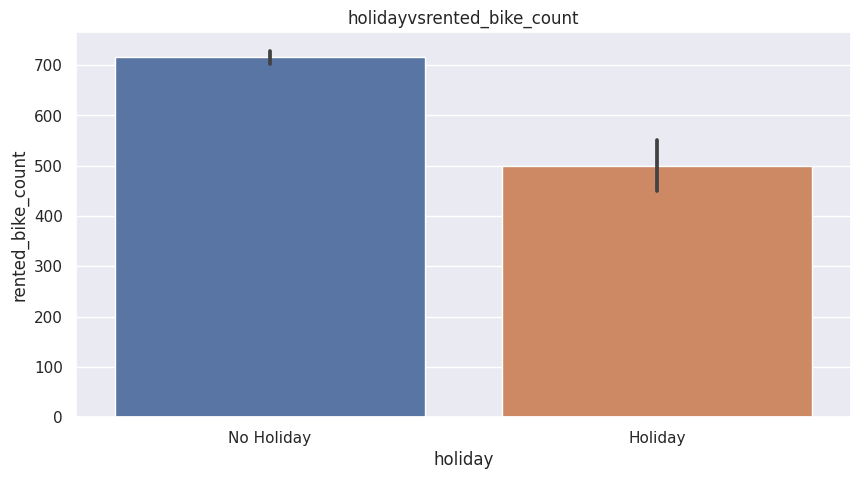

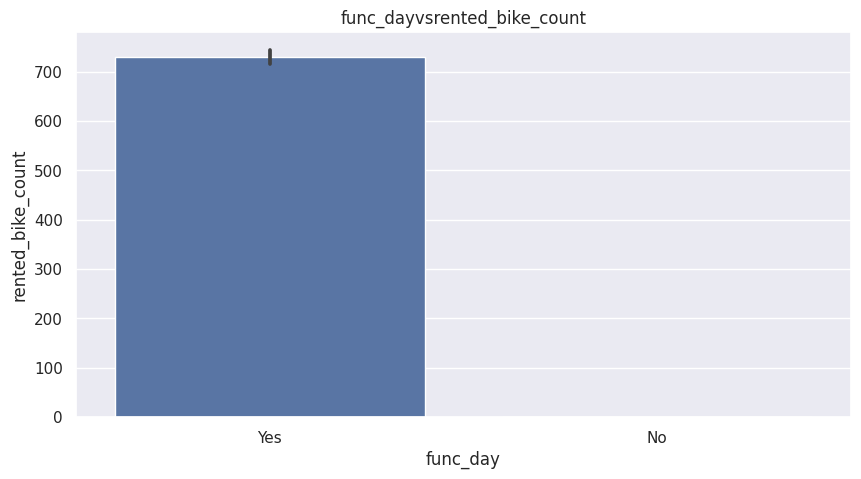

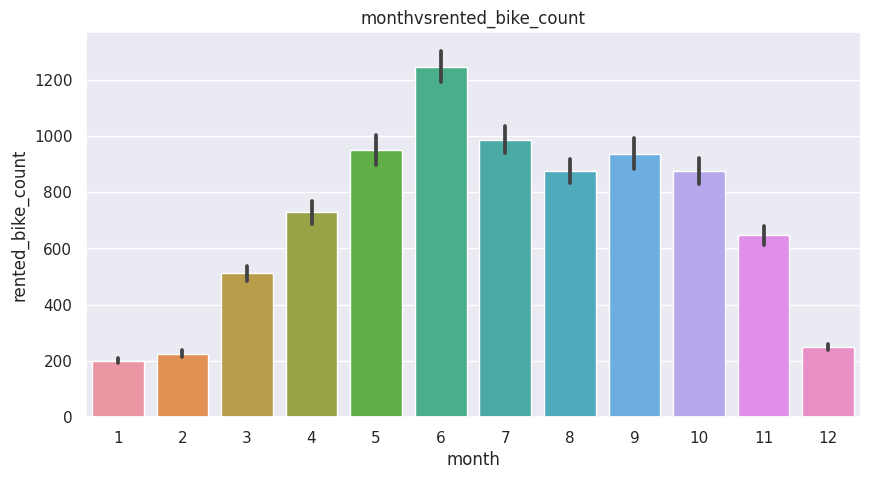

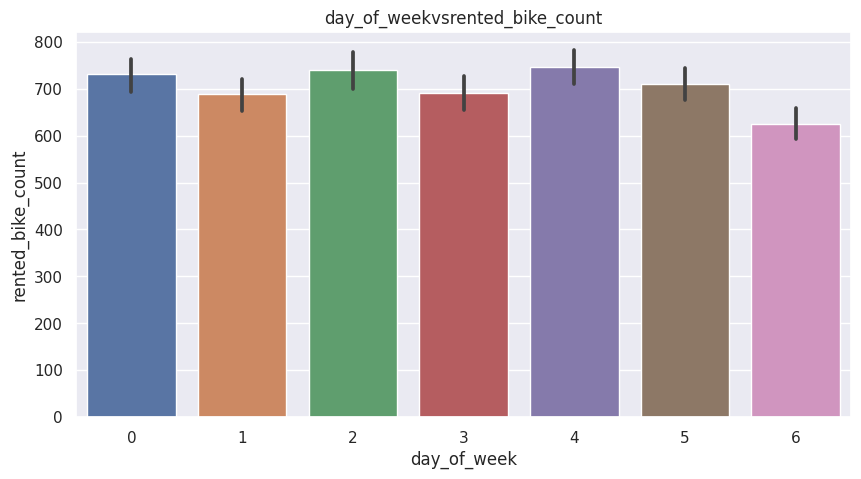

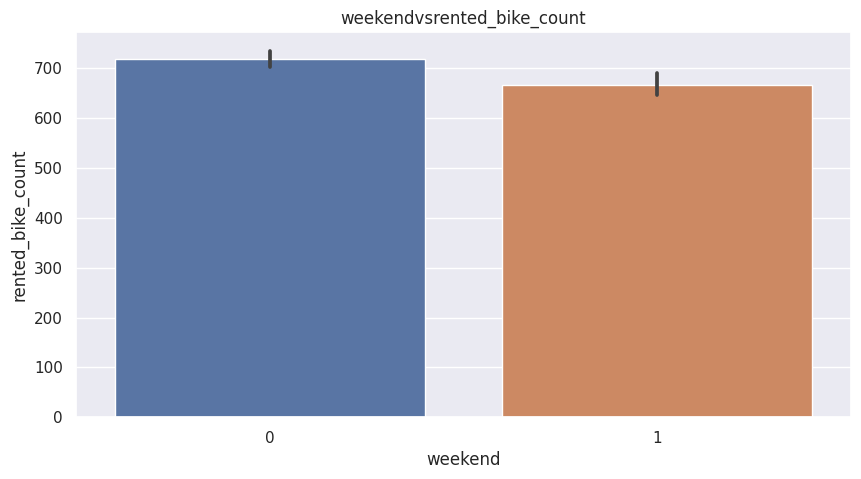

In [33]:
for i in categorical_var:
  plt.figure(figsize = (10,5))
  sns.barplot(x=i,y=dependent_variable[0], data = data)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+'vs'+ dependent_variable[0])
  plt.show()

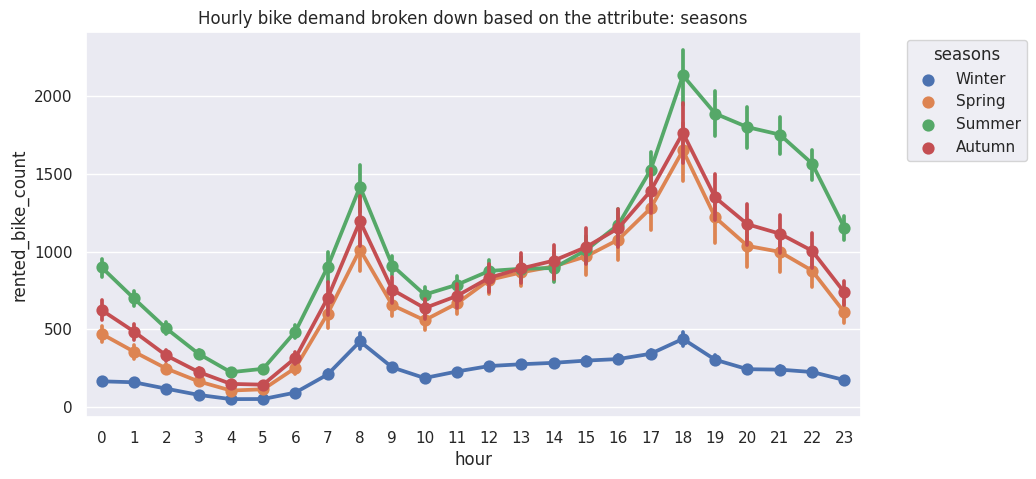

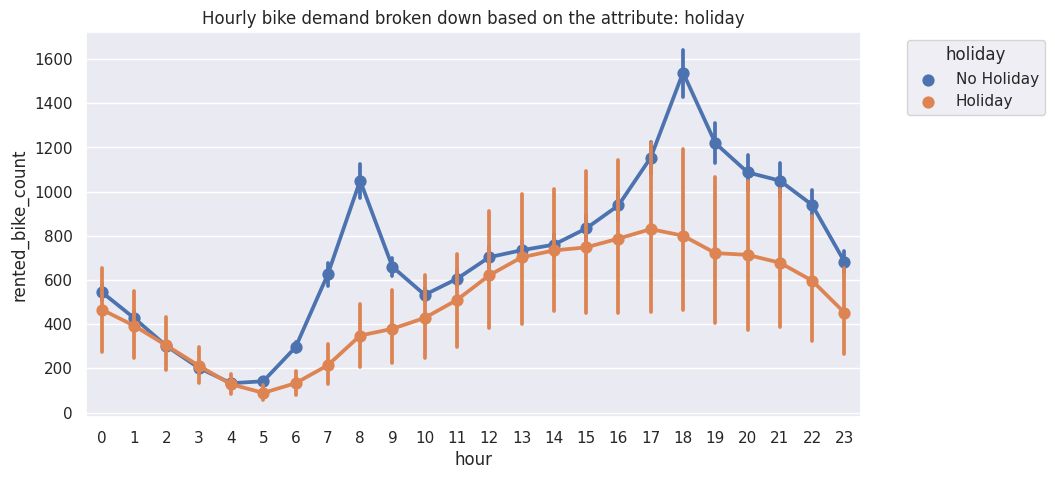

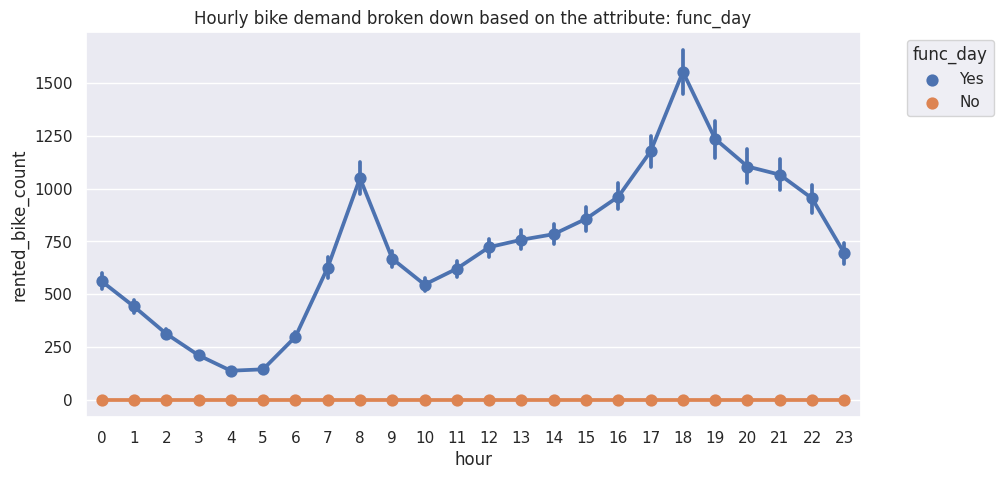

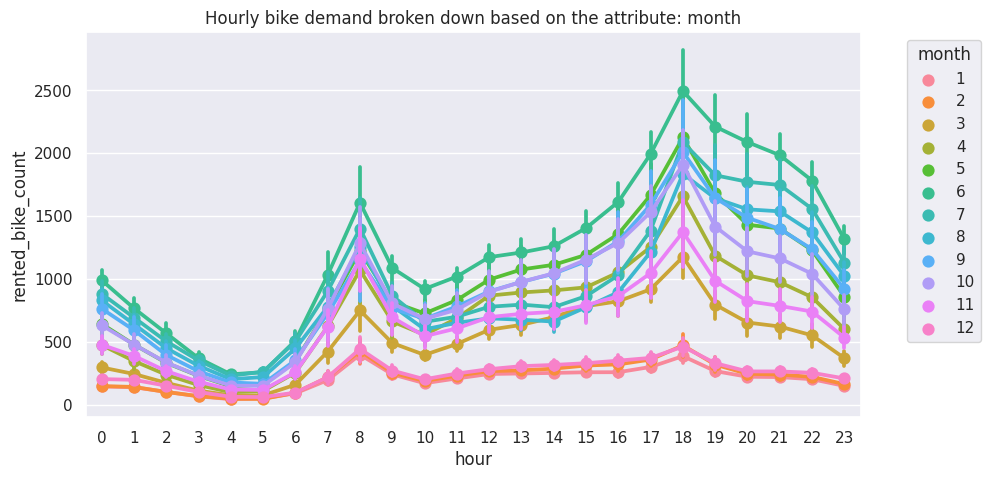

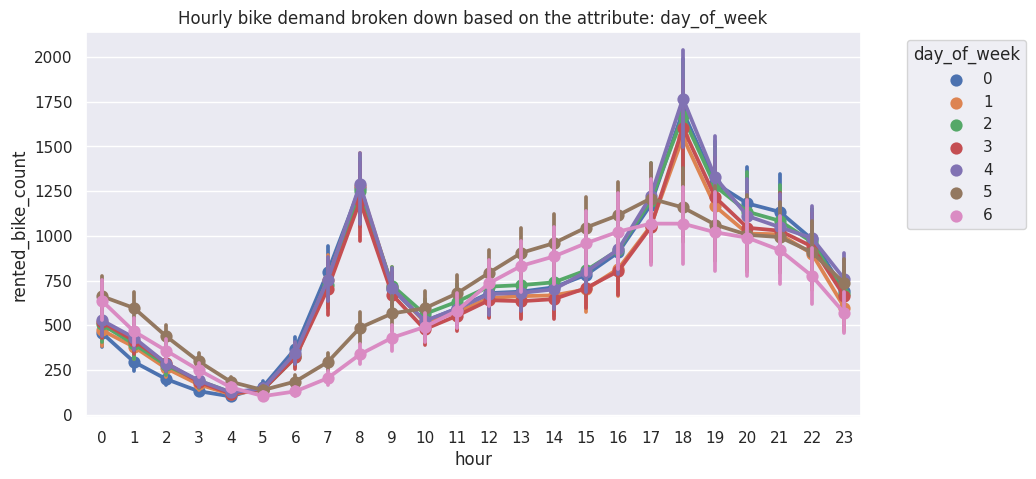

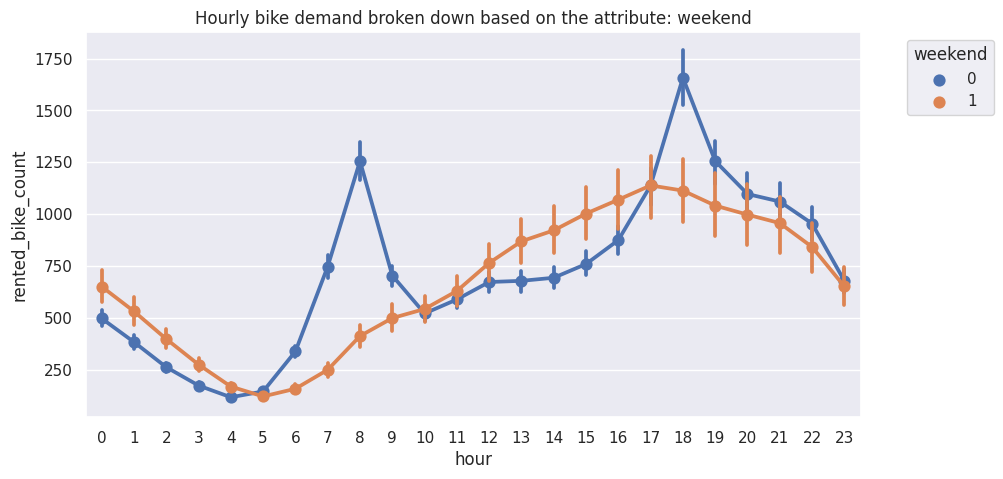

In [34]:
# Bike demand throughout the day:
for i in categorical_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=data, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

In [35]:
# sonowfall and rai fall to categorical attriutes
data['snowfall'] = data['snowfall'].apply(lambda x:1 if x>0 else 0)
data['rainfall'] = data['rainfall'].apply(lambda x:1 if x>0 else 0)

In [36]:
data.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,day_of_week,weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0,0,Winter,No Holiday,Yes,12,4,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0,0,Winter,No Holiday,Yes,12,4,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0,0,Winter,No Holiday,Yes,12,4,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0,0,Winter,No Holiday,Yes,12,4,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0,0,Winter,No Holiday,Yes,12,4,0


In [37]:
# When visibility >=20Km----> clear high visibility
#4km <= visibility < 10km ---> Haze (medium visibility)
# visibility < 4km ---> Fog (low visibility)

# Encoding the visibility
data['visibility'] = pd.cut(data.visibility, bins = [0,399,999,2001], labels = [0,1,2])

In [38]:
data = pd.get_dummies(data, columns = ['month','hour','day_of_week'])

In [39]:
data.columns

Index(['date', 'rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day', 'weekend', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'],
      dtype='object')

In [40]:
data.drop(['seasons','weekend'], axis = 1, inplace = True)

In [41]:
data.head()

,date,rented_bike_count,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,...,hour_21,hour_22,hour_23,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2017-12-01,254,-5.2,37,2.2,2,0.0,0,0,No Holiday,...,0,0,0,0,0,0,0,1,0,0
1,2017-12-01,204,-5.5,38,0.8,2,0.0,0,0,No Holiday,...,0,0,0,0,0,0,0,1,0,0
2,2017-12-01,173,-6.0,39,1.0,2,0.0,0,0,No Holiday,...,0,0,0,0,0,0,0,1,0,0
3,2017-12-01,107,-6.2,40,0.9,2,0.0,0,0,No Holiday,...,0,0,0,0,0,0,0,1,0,0
4,2017-12-01,78,-6.0,36,2.3,2,0.0,0,0,No Holiday,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# Encoding the func_dat and holiday
data['func_day'] = np.where(data['func_day']== 'Yes',1,0)
data['holiday'] = np.where(data['holiday'] == 'Holiday', 1,0)

In [43]:
data.head()

,date,rented_bike_count,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,...,hour_21,hour_22,hour_23,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2017-12-01,254,-5.2,37,2.2,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2017-12-01,204,-5.5,38,0.8,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2017-12-01,173,-6.0,39,1.0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2017-12-01,107,-6.2,40,0.9,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2017-12-01,78,-6.0,36,2.3,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
data.drop('date', axis = 1, inplace = True)


In [45]:
data.head()

,rented_bike_count,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,func_day,...,hour_21,hour_22,hour_23,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,254,-5.2,37,2.2,2,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,204,-5.5,38,0.8,2,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,173,-6.0,39,1.0,2,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,107,-6.2,40,0.9,2,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,78,-6.0,36,2.3,2,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [46]:
X = data.drop('rented_bike_count', axis = 1)
y = np.sqrt(data[dependent_variable])

In [47]:
data.shape

(8760, 53)

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 0, shuffle = True)

In [54]:
# RMSE
def rmse(actual, predicted):
  mse = mean_squared_error(actual,predicted)
  rmse = np.sqrt(mse)
  return rmse

In [57]:
model_1 = DecisionTreeRegressor(random_state = 0)
params_1 = {'max_depth':np.arange(20,26),
            'min_samples_leaf': np.arange(30,41,2)}

In [58]:
# fitting model with hypertuned parameters using grid search CV
gridsearch = GridSearchCV(model_1, params_1, cv = 6, scoring = 'neg_root_mean_squared_error')
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([20, 21, 22, 23, 24, 25]),
                         'min_samples_leaf': array([30, 32, 34, 36, 38, 40])},
             scoring='neg_root_mean_squared_error')

In [59]:
best_params_1 = gridsearch.best_params_

In [60]:
best_params_1

{'max_depth': 24, 'min_samples_leaf': 30}

In [61]:
model_1_new = DecisionTreeRegressor(max_depth = best_params_1['max_depth'],
                                    min_samples_leaf = best_params_1['min_samples_leaf'],
                                    random_state = 0)

In [62]:
model_1_new.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=24, min_samples_leaf=30, random_state=0)

In [63]:
y_train_pred = model_1_new.predict(X_train)

In [64]:
y_test_pred = model_1_new.predict(X_test)

In [65]:
from sklearn.metrics import r2_score

In [66]:
train_r2_score = r2_score(np.square(y_train), np.square(y_train_pred))

In [67]:
train_r2_score

0.8330787041043375

In [71]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()

In [72]:
model_fitted = model_2.fit(X_train,y_train)

In [76]:
y_pred = model_fitted.predict(X_test)

In [77]:
y_pred

array([[19.03347778],
       [24.53991699],
       [21.07669067],
       ...,
       [22.35147095],
       [34.78320312],
       [28.85272217]])

In [78]:
score = model_fitted.score(X_test,y_test)
score

0.8065136797232252